In [1]:
# kaggle requires saving a key in root folder of project.
# for windows
import os
#cur_dir = os.getcwd()
#print(cur_dir)
#kaggle_dir = 'kaggle'
#mpath = os.path.join(cur_dir,kaggle_dir) 
#os.makedirs(mpath)

In [1]:
#from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
#api = KaggleApi()
#api.authenticate()

In [1]:
#!kaggle datasets list -s 'gtsrb-german-traffic-sign'

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          68138        886  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           8983        234  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            324          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

In [4]:
#!kaggle datasets download -d 'meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
#!kaggle datasets download -d 'meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

403 - Forbidden


In [31]:
from pathlib import Path
dataset_path = Path('E:\Datasets\\traffic_sign_classification')
train_path = dataset_path / 'train'
test_path = dataset_path / 'test'
#print(train_path)
train_iter = train_path.iterdir()
print(next(train_iter))

E:\Datasets\traffic_sign_classification\train\0


In [3]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random 
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [24]:
#p = train_path.glob('**/*')
#random.choice(sorted(os.listdir(train_path))).glob('**/*')
imdirs = list(train_path.iterdir()) 
#print(imdirs)
for dir in imdirs:
    #tmp = dir.glob('**/*')
    file_list = list(dir.iterdir())
    if file_list is not None:
        print(random.choice(file_list))
    else:
        print('empty for dir')    


E:\Datasets\traffic_sign_classification\train\0\00000_00001_00020.png
E:\Datasets\traffic_sign_classification\train\1\00001_00054_00008.png
E:\Datasets\traffic_sign_classification\train\10\00010_00000_00015.png
E:\Datasets\traffic_sign_classification\train\11\00011_00016_00004.png
E:\Datasets\traffic_sign_classification\train\12\00012_00037_00009.png
E:\Datasets\traffic_sign_classification\train\13\00013_00064_00004.png
E:\Datasets\traffic_sign_classification\train\14\00014_00019_00001.png
E:\Datasets\traffic_sign_classification\train\15\00015_00009_00011.png
E:\Datasets\traffic_sign_classification\train\16\00016_00003_00014.png
E:\Datasets\traffic_sign_classification\train\17\00017_00007_00018.png
E:\Datasets\traffic_sign_classification\train\18\00018_00032_00027.png
E:\Datasets\traffic_sign_classification\train\19\00019_00005_00017.png
E:\Datasets\traffic_sign_classification\train\2\00002_00026_00019.png
E:\Datasets\traffic_sign_classification\train\20\00020_00010_00011.png
E:\Datase

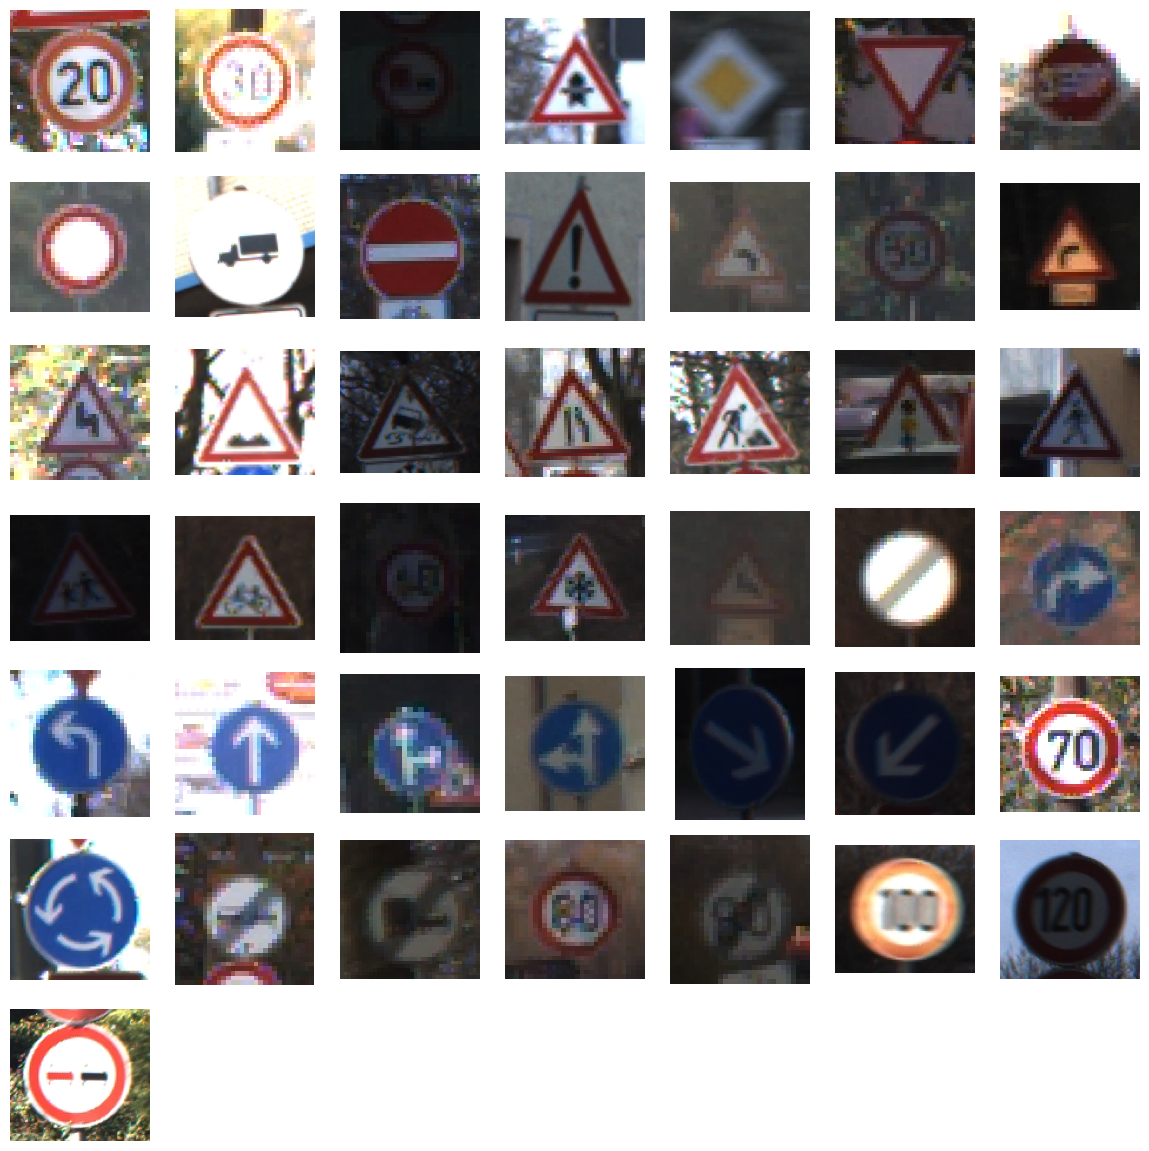

In [4]:
plt.figure(figsize=(12,12))
imdirs = list(train_path.iterdir())
for i,dir in enumerate(imdirs):
    plt.subplot(7,7,i+1)
    plt.tight_layout()
    #file_list = list(dir.iterdir())
    rand_img = imread(random.choice(list(dir.iterdir())))
    plt.axis('off')
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [5]:
dim1 = []
dim2 = []
# imdirs contains all the label directories
for dir in imdirs:
    image_path = list(dir.iterdir()) # retrun a list of images in each label directory
    for x in image_path:
        img= imread(x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [6]:
#Printing mean dimension of images
print(f"Dimension 1 Mean : {np.mean(dim1)} Dimension 2 Mean : {np.mean(dim2)}")

Dimension 1 Mean : 50.328929582493814 Dimension 2 Mean : 50.83587951745773


In [33]:
for i, dir in enumerate(imdirs):
    print(f'label : {int(dir.stem)}  Image direcotry path: {dir}')

label : 0  Image direcotry path: E:\Datasets\traffic_sign_classification\train\0
label : 1  Image direcotry path: E:\Datasets\traffic_sign_classification\train\1
label : 10  Image direcotry path: E:\Datasets\traffic_sign_classification\train\10
label : 11  Image direcotry path: E:\Datasets\traffic_sign_classification\train\11
label : 12  Image direcotry path: E:\Datasets\traffic_sign_classification\train\12
label : 13  Image direcotry path: E:\Datasets\traffic_sign_classification\train\13
label : 14  Image direcotry path: E:\Datasets\traffic_sign_classification\train\14
label : 15  Image direcotry path: E:\Datasets\traffic_sign_classification\train\15
label : 16  Image direcotry path: E:\Datasets\traffic_sign_classification\train\16
label : 17  Image direcotry path: E:\Datasets\traffic_sign_classification\train\17
label : 18  Image direcotry path: E:\Datasets\traffic_sign_classification\train\18
label : 19  Image direcotry path: E:\Datasets\traffic_sign_classification\train\19
label : 

In [7]:
# Now we will reshape the images to (50,50)
images = []
label_id = []
for dir in imdirs:
    label= int(dir.stem)
    images_list_tmp =  list(dir.iterdir())
    for img_path in images_list_tmp:
        img = Image.open(img_path)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(label)

In [8]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [9]:
label_id = np.array(label_id)

In [10]:
print(f"Image shape: {images.shape}  Label shape: {label_id.shape}")

Image shape: (39209, 50, 50, 3)  Label shape: (39209,)


<AxesSubplot: xlabel='0'>

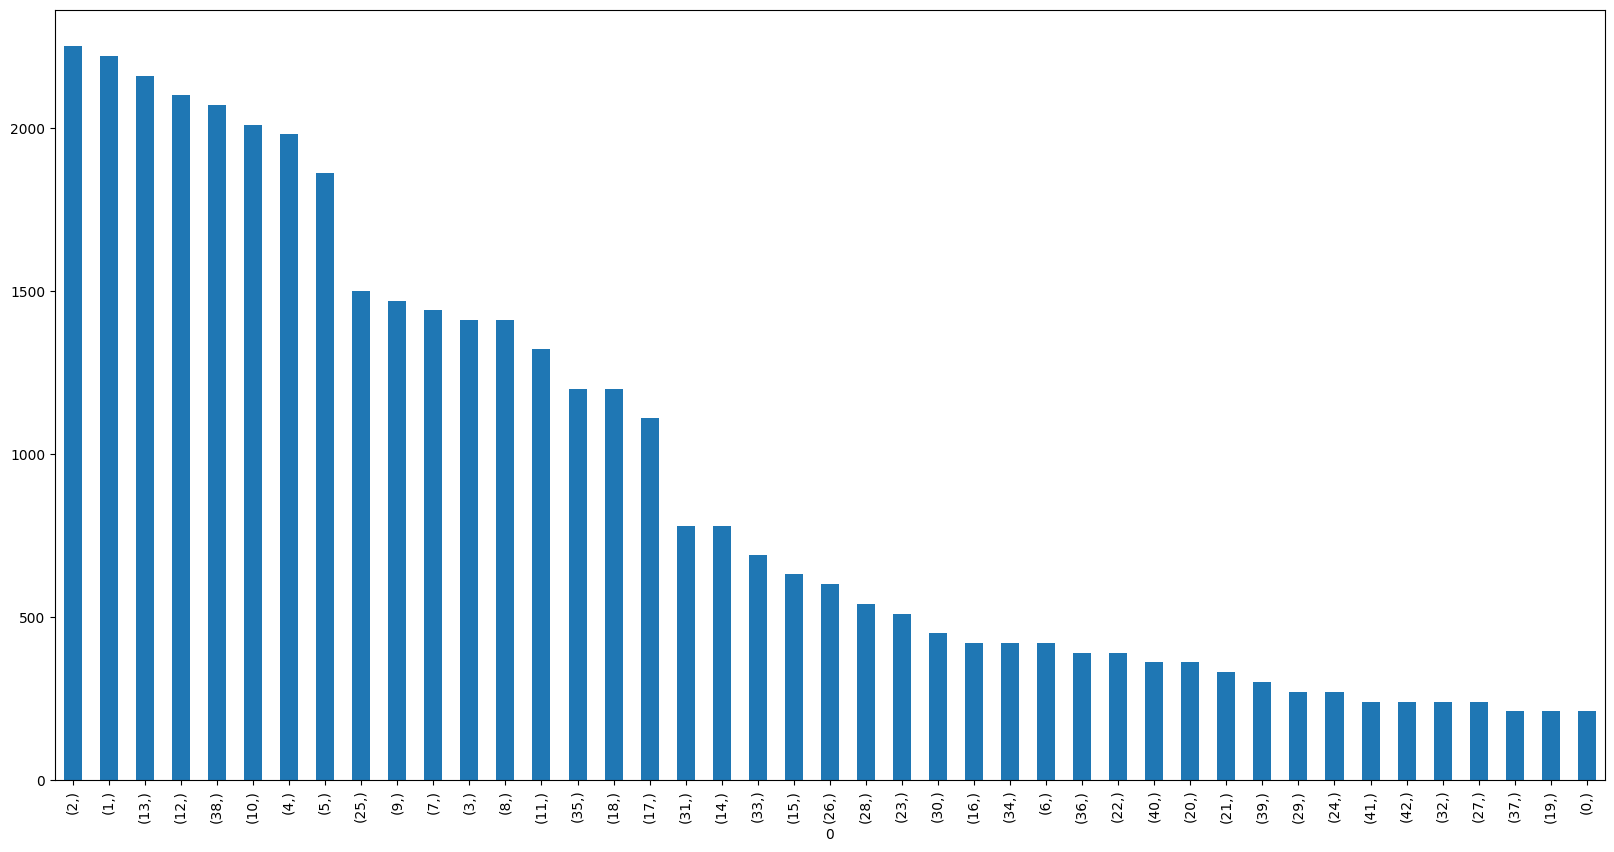

In [38]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.plot.bar(figsize= (20,10))
#label_counts.head()

In [11]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [12]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)       

In [24]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/10
246/246 [==============================] - 7s 24ms/step - loss: 2.6293 - accuracy: 0.2847 - val_loss: 1.3431 - val_accuracy: 0.6634
Epoch 2/10
246/246 [==============================] - 6s 23ms/step - loss: 1.3854 - accuracy: 0.5632 - val_loss: 0.6349 - val_accuracy: 0.8666
Epoch 3/10
246/246 [==============================] - 6s 23ms/step - loss: 0.9809 - accuracy: 0.6812 - val_loss: 0.3767 - val_accuracy: 0.9258
Epoch 4/10
246/246 [==============================] - 6s 23ms/step - loss: 0.7792 - accuracy: 0.7459 - val_loss: 0.2891 - val_accuracy: 0.9444
Epoch 5/10
246/246 [==============================] - 6s 23ms/step - loss: 0.6694 - accuracy: 0.7793 - val_loss: 0.2299 - val_accuracy: 0.9588
Epoch 6/10
246/246 [==============================] - 6s 23ms/step - loss: 0.5984 - accuracy: 0.8030 - val_loss: 0.1722 - val_accuracy: 0.9723
Epoch 7/10
246/246 [==============================] - 6s 23ms/step - loss: 0.5425 - accuracy: 0.8219 - val_loss: 0.1283 - val_accuracy: 0.9773

<AxesSubplot: >

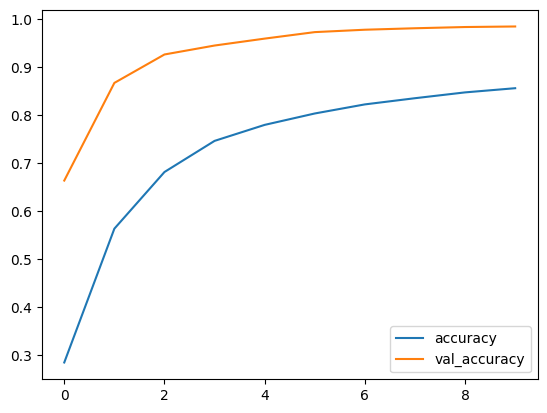

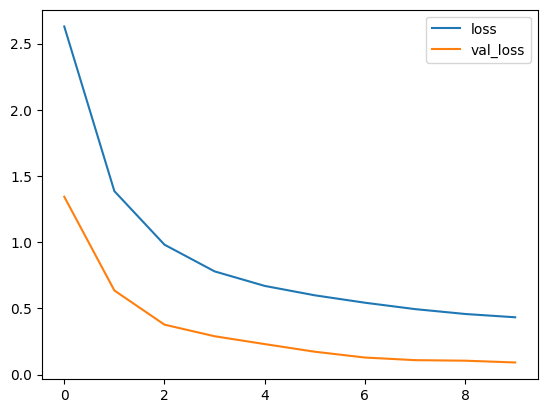

In [25]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [17]:

# Now we will reshape the images to (50,50)
def image_preprocessing_from_path(test_path):
    test_imgs = list(test_path.iterdir())
    images = []
    for img in test_imgs:
        img = Image.open(img_path)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
    images = np.array(images)
    images = images/255
    return images

In [26]:
test_images = image_preprocessing_from_path(test_path)
test_images.shape

(12631, 50, 50, 3)

In [19]:
# loading the test labels
import pandas as pd
y_test = pd.read_csv(dataset_path.joinpath('Test.csv'))
y_test = y_test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [27]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 1s 3ms/step


array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

In [21]:
np.unique(y_pred, return_counts=True)

(array([9], dtype=int64), array([12631], dtype=int64))

In [28]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

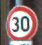

In [36]:
# Visualize test image

img = Image.open(test_path.joinpath('00001.png'))
img
# test_path

In [37]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [38]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  No passing
